In [1]:
import os
import sys
from pathlib import Path
import numpy as np
repo_root = Path.cwd().parent
sys.path.append(str(repo_root))

folder_name = os.path.join(r'\\10.229.121.108','Workspace','PAT LINEAR','PATDOTUS','01')
from src.load_data_utils import list_subfolders, linear_us_param, linear_pa_param
import matplotlib.pyplot as plt

all_folders = list_subfolders(folder_name)
print(f"Found {len(all_folders)} image folders")
info_US = linear_us_param()
info_PA = linear_pa_param()

Found 31 image folders


In [2]:
# Estimate background mu at PAT wavelengths
from src.fluence_utils import estimate_so2_from_dot, query_bkg_mua_for_pa, fit_bkg_mus_for_pa
lambda_list_dot = [730   , 785   , 808   , 830]
mua_list_dot    = [0.032 , 0.038 , 0.037 , 0.041]
mus_list_dot    = [7.860 , 7.489 , 7.155 , 7.830]
decomp_dot      = estimate_so2_from_dot(lambda_list_dot , mua_list_dot , verbose=True)
lambda_list_pat = [750   , 780   , 800   , 830]
bkg_mua_pat = query_bkg_mua_for_pa(lambda_list_pat , decomp_dot['c_oxy'] , decomp_dot['c_deoxy'])
print("Background mua at PAT wavelengths are " , bkg_mua_pat['Background mua'] , " cm\u207B\u00B9")
bkg_mus_pat = fit_bkg_mus_for_pa(lambda_list_dot, mus_list_dot, lambda_list_pat)
print("Background mus at PAT wavelengths are " , bkg_mus_pat['Background mus'] , " cm\u207B\u00B9")

Estimated hemoglobin concentrations from DOT
[HbO2] = 5.22379 mmol/L
[Hb]   = 3.48574 mmol/L
sO2    = 59.98%
Background mua at PAT wavelengths are  [0.04072679 0.03994147 0.03705028 0.04018856]  cm⁻¹
Background mus at PAT wavelengths are  [7.6842432  7.60231057 7.54988587 7.4743008 ]  cm⁻¹


In [3]:
# Initialize mua and mus maps
from src.recon_utils import generate_mu_init
mu_a_bkg  = bkg_mua_pat['Background mua'][1]
mu_sp_bkg = bkg_mus_pat['Background mus'][1]
bbox_cm = (-1.25, 1.25, 0.0, 4.0)
pixel_cm = (0.1, 0.1)
input_dir = all_folders[25]
res = generate_mu_init(input_dir , info_US , info_PA , 
                       mu_a_mean_cm=mu_a_bkg , mu_s_mean_cm = mu_sp_bkg,
                       bbox_cm = bbox_cm , pixel_size_cm = pixel_cm)

mu maps initialized.


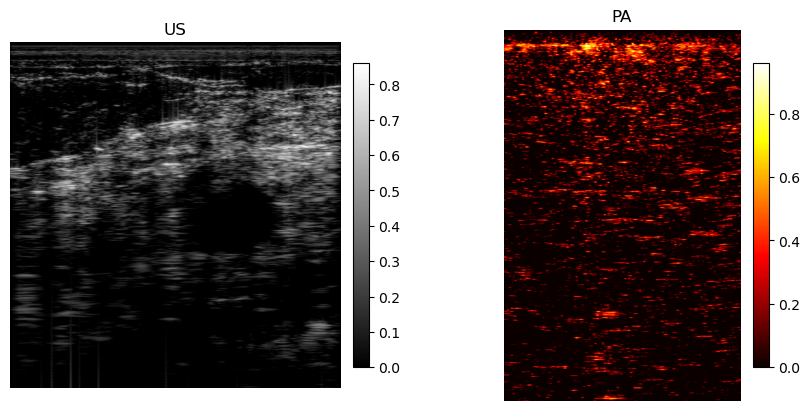

In [4]:
# Plot US and PAT images
fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
im0 = axes[0].imshow(res["US image"], cmap='gray', extent=[-info_US.FOV*50.0, info_US.FOV*50.0, 4.0, 0.0])
axes[0].set_title(r"US", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(res["PAT image"], cmap='hot', extent=[-info_PA.FOV*50.0, info_PA.FOV*50.0, 4.0, 0.0])
axes[1].set_title(r"PA", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)

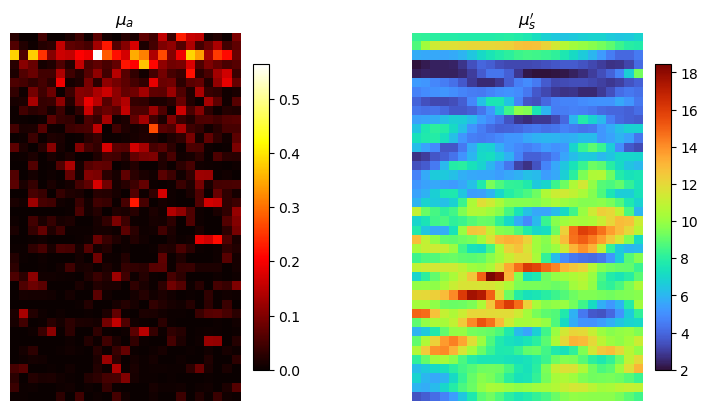

In [5]:
# Plot initial mu_a and mu_s maps
xmin, xmax, zmin, zmax = bbox_cm
fig, axes = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
im0 = axes[0].imshow(res["mua0"], cmap='hot',  extent=[xmin, xmax, zmax, zmin])
axes[0].set_title(r"$\mu_a$", fontsize=12)
axes[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.ax.tick_params(labelsize=10)
im1 = axes[1].imshow(res["mus0"], cmap='turbo',  extent=[xmin, xmax, zmax, zmin])
axes[1].set_title(r"$\mu_s^{\prime}$", fontsize=12)
axes[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.ax.tick_params(labelsize=10)